<a href="https://colab.research.google.com/github/ArcaneMystagogue/ML-DL-journey/blob/main/Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Using ```ONE-HOT```

In [57]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
car = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/usedcars.csv")
car.head()

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO


In [59]:
car_onehot = pd.get_dummies(car)
car_onehot.head()

,year,price,mileage,model_SE,model_SEL,model_SES,color_Black,color_Blue,color_Gold,color_Gray,color_Green,color_Red,color_Silver,color_White,color_Yellow,transmission_AUTO,transmission_MANUAL
0,2011,21992,7413,False,True,False,False,False,False,False,False,False,False,False,True,True,False
1,2011,20995,10926,False,True,False,False,False,False,True,False,False,False,False,False,True,False
2,2011,19995,7351,False,True,False,False,False,False,False,False,False,True,False,False,True,False
3,2011,17809,11613,False,True,False,False,False,False,True,False,False,False,False,False,True,False
4,2012,17500,8367,True,False,False,False,False,False,False,False,False,False,True,False,True,False


In [60]:
X = car_onehot.drop("price",axis=1)
y = car_onehot["price"]

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [62]:
len(X_train), len(y_train), len(X_test), len(y_test)

(120, 120, 30, 30)

In [63]:
# Setting up random seed
tf.random.set_seed(42)

# Creating the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

# Compiling the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

# Fitting the model
history = model_1.fit(X_train.astype('float32'),y_train.astype('float32'),epochs=100,verbose = 0)

In [64]:
model_1.evaluate(X_test.astype("float32"),y_test.astype("float32"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 1186.5663 - mae: 1186.5663


[1186.5662841796875, 1186.5662841796875]

Text(0.5, 0, 'Epochs')

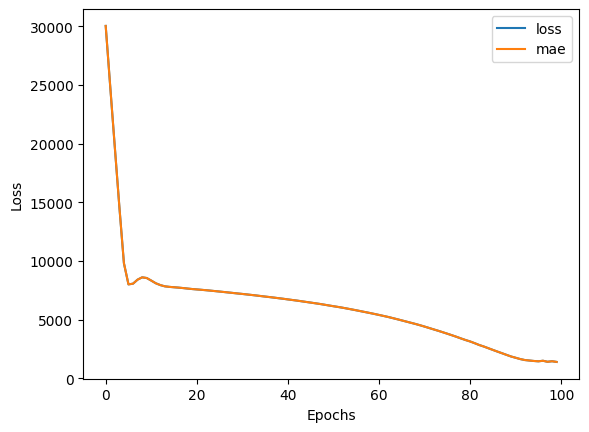

In [65]:
# Plotting loss curves
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

## Using ```Normalization and Standardization```

In [66]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [67]:
model_2 = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/usedcars.csv')
model_2.head()

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO


In [68]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Creating column transformer
ct = make_column_transformer(
    (MinMaxScaler(),['year','mileage']),
    (OneHotEncoder(handle_unknown='ignore'),['model','color','transmission']))

X = car.drop('price',axis=1)
y = car['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [90]:
# Setting up random seed
tf.random.set_seed(42)

# Creating model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    # tf.keras.layers.Dense(10,activation='relu')
    tf.keras.layers.Dense(1)])

# Compiling
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# Fitting the model
history = model_2.fit(X_train_normal,y_train,epochs=200,verbose=0)

In [89]:
# Evaluating model
model_2.evaluate(X_test_normal,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 1439.5526 - mae: 1439.5526


[1439.5526123046875, 1439.5526123046875]

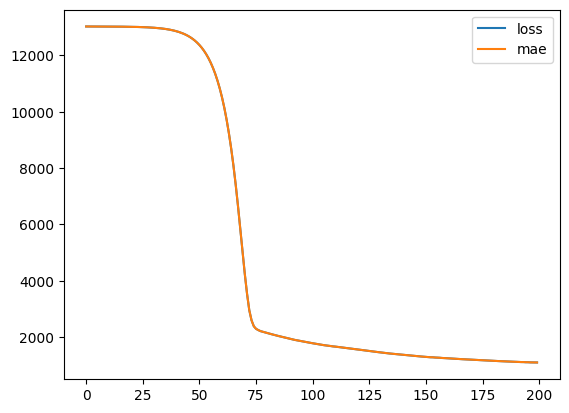

In [88]:
pd.DataFrame(history.history).plot()
plt.xlabel = 'Epochs'
plt.ylabael = 'Loss'